In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains sales data from different outlets of a retail goods business

In [358]:
df = pd.read_csv("bigdatamart_train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [359]:
df.shape

(8523, 12)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Let's look at different entries in categorical features

In [361]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDV38     9
FDO19     9
NCI54     9
         ..
FDE52     1
FDK57     1
FDO33     1
FDY43     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

The retail business sells 1559 different items

In [362]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Clearly the entries are not standardised, let's change all entries into Low Fat and Regular

In [363]:
df['Item_Fat_Content'].replace(["LF","low fat"],"Low Fat",inplace=True)
df['Item_Fat_Content'].replace(["reg"],"Regular",inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [364]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

The above list provides the complete types of items that are sold

In [365]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

The above is the list of all the outlets in the business

In [366]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [367]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [368]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [369]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Bivariate analysis

In [370]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Let's look at the total sales as per outlet type 

In [371]:
Outlet_Type = df.groupby(['Outlet_Type'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Type,,,,,
Grocery Store,7166.800,113.565873,151939.1470,2156970,3.680343e+05
Supermarket Type1,71661.710,338.651189,787549.8868,11150224,1.291734e+07
Supermarket Type2,11946.465,56.621454,131477.7724,1864352,1.851823e+06
Supermarket Type3,0.000,54.804764,130714.6746,1855975,3.453926e+06


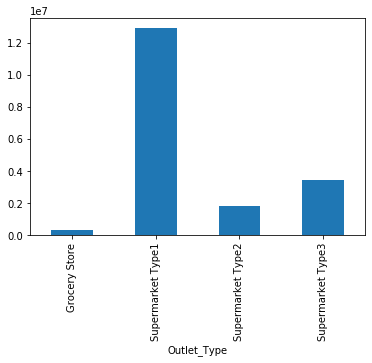

In [372]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

As per the above plot total sales were highest at Supermarket type 1 and lowest at grocery stores

Let's look at the total sales as per outlet location type

In [373]:
Outlet_Type = df.groupby(['Outlet_Location_Type'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Location_Type,,,,,
Tier 1,23979.350,170.038072,336397.8120,4764360,4.482059e+06
Tier 2,35560.630,169.990299,393150.6416,5582060,6.472314e+06
Tier 3,31234.995,223.614910,472133.0272,6681101,7.636753e+06


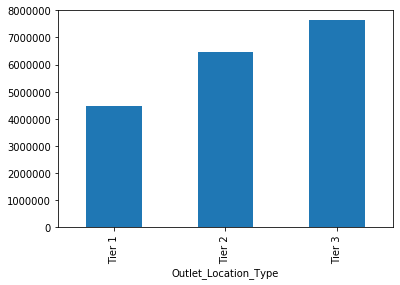

In [374]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

From the above plots it is clear that highest total sales were observed at outlets having Tier 3 location type

Let's look at the total sales as per outlet size

In [375]:
Outlet_Type = df.groupby(['Outlet_Size'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Size,,,,,
High,12121.73,55.879859,131809.0156,1851884,2.142664e+06
Medium,23959.69,167.975374,392669.3068,5579397,7.489719e+06
Small,23897.42,170.463790,339024.8592,4769010,4.566212e+06


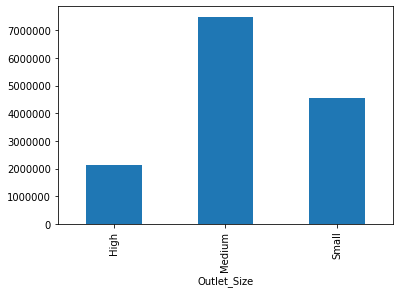

In [376]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

From the abobe plots it is clear that outlets of medium size have the highest total sales followed by small size outlets

Let's look at the total sales as per outlet establishment year

In [377]:
Outlet_Type = df.groupby(['Outlet_Establishment_Year'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,0.000,112.061805,204522.2570,3.633620e+06
1987,12121.730,55.879859,131809.0156,2.142664e+06
1997,11966.125,56.231875,132113.3698,2.118395e+06
1998,7166.800,56.308832,78131.5646,1.883402e+05
1999,12013.225,56.549156,130476.8598,2.183970e+06
2002,11751.840,56.180780,130942.7782,2.036725e+06
2004,11931.295,56.974873,133103.9070,2.268123e+06
2007,11877.495,56.834646,129103.9564,2.167465e+06
2009,11946.465,56.621454,131477.7724,1.851823e+06


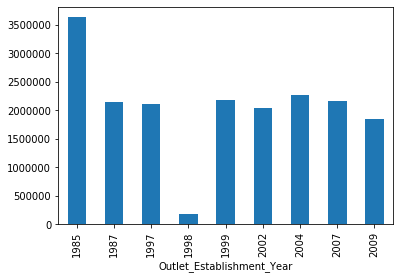

In [378]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

From the above plots it is clear that outlet(s) which were opened in the year 1985 have the highest total sales whereas outlet(s) which were opened in the year 1998 have the lowest total sales

Let's look at the total sales for different outlets

In [379]:
Outlet_Type = df.groupby(['Outlet_Identifier'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT010,7166.800,56.308832,78131.5646,1108890,1.883402e+05
OUT013,12121.730,55.879859,131809.0156,1851884,2.142664e+06
OUT017,11877.495,56.834646,129103.9564,1858482,2.167465e+06
OUT018,11946.465,56.621454,131477.7724,1864352,1.851823e+06
OUT019,0.000,57.257041,73807.5824,1048080,1.796941e+05
OUT027,0.000,54.804764,130714.6746,1855975,3.453926e+06
OUT035,11931.295,56.974873,133103.9070,1863720,2.268123e+06
OUT045,11751.840,56.180780,130942.7782,1859858,2.036725e+06
OUT046,11966.125,56.231875,132113.3698,1857210,2.118395e+06


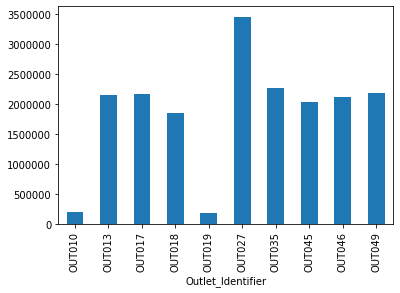

In [380]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

Clearly OUT027 has the highest total sales and OUT019 along with OUT010 has the least total sales

Let's look at the total sales as per item type

In [381]:
Outlet_Type = df.groupby(['Item_Type'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,6580.530,44.821706,81894.7364,1294528,1.265525e+06
Breads,2314.775,16.630030,35379.1198,501412,5.532372e+05
Breakfast,1136.370,9.429531,15596.6966,219707,2.322990e+05
Canned,6632.775,44.215926,90706.7270,1296801,1.444151e+06
Dairy,7599.155,49.395349,101276.4596,1362419,1.522594e+06
Frozen Foods,9238.550,56.192325,118558.8814,1710309,1.825735e+06
Fruits and Vegetables,13476.040,84.407946,178124.0810,2461191,2.820060e+06
Hard Drinks,2086.260,13.897707,29334.6766,427610,4.577934e+05
Health and Hygiene,5651.195,28.712309,68025.8388,1038822,1.045200e+06


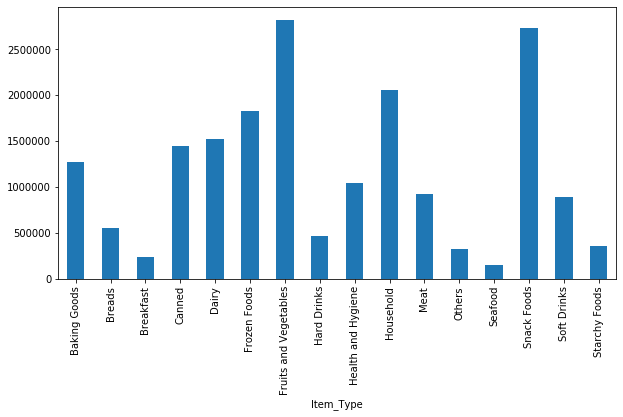

In [382]:
Outlet_Type["Item_Outlet_Sales"].plot.bar(figsize=(10,5))

As per the above plot, snack foods and Fruits & vegetables have the highest total sales and seafood items has the least total sales

Let's look at the total sales as per item fat content

In [383]:
Outlet_Type = df.groupby(['Item_Fat_Content'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,59072.110,354.909065,776319.6784,11021931,1.190409e+07
Regular,31702.865,208.734216,425361.8024,6005590,6.687031e+06


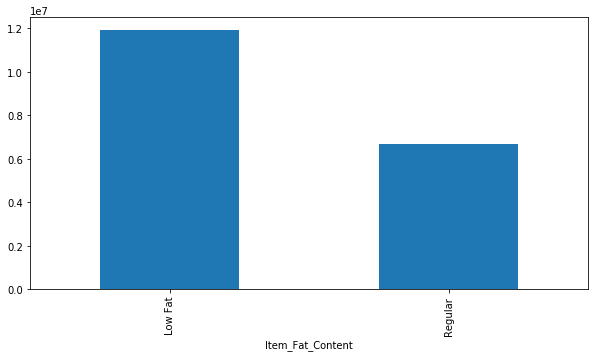

In [384]:
Outlet_Type["Item_Outlet_Sales"].plot.bar(figsize=(10,5))

Total sales figure is almost double for items with low fat content compared to items with regular fat content

In [385]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Let's look at average sales of an item throughout all outlets

In [386]:
Item_Id = df.groupby(['Item_Identifier'],sort = True).mean()
Item_Id

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,6.590,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500,0.009044,236.644800,1999.000000,3839.801760


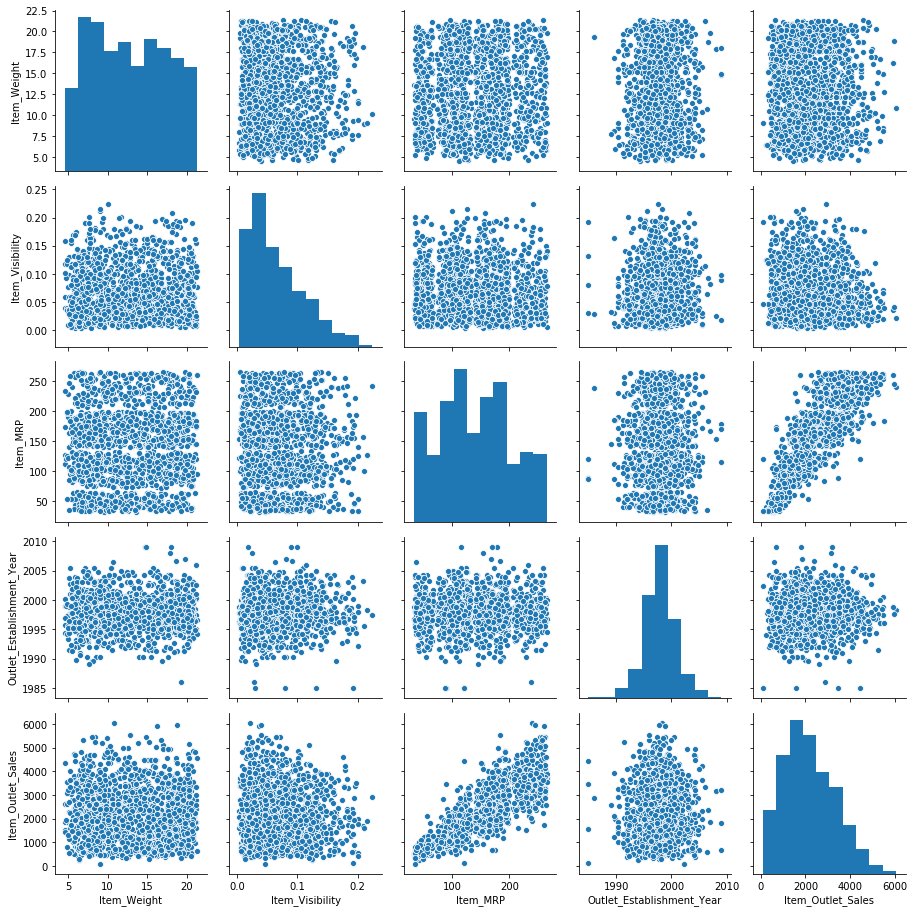

In [194]:
sns.pairplot(Item_Id)

In [387]:
Item_corr = Item_Id.corr()
Item_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007582,0.035985,-0.029410,0.028587
Item_Visibility,-0.007582,1.000000,-0.006884,0.017550,-0.043157
Item_MRP,0.035985,-0.006884,1.000000,0.028757,0.850871
Outlet_Establishment_Year,-0.029410,0.017550,0.028757,1.000000,0.007303
Item_Outlet_Sales,0.028587,-0.043157,0.850871,0.007303,1.000000


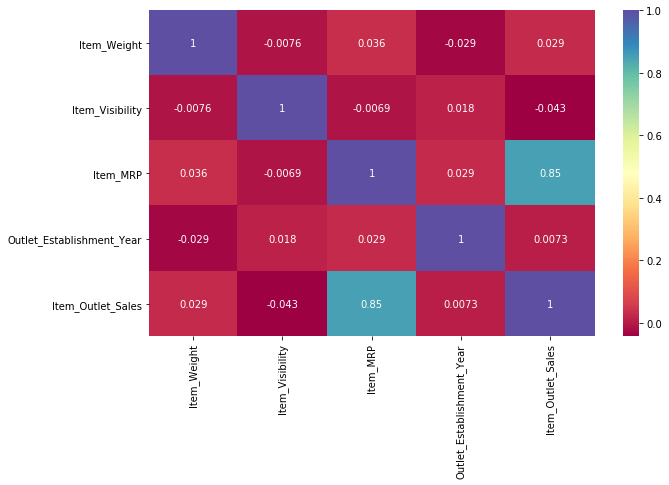

In [388]:
plt.figure(figsize=(10,6))
sns.heatmap(Item_corr,cmap='Spectral',annot=True)

From the above plots, it is clear that average sales for an item is strongly correlated to it's MRP for all outlets

Let's look at the total sales figure for all items

In [389]:
Item_Id = df.groupby(['Item_Identifier'],sort = True).sum()
Item_Id

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,69.600,0.191737,851.1924,12007,11061.6012
DRA24,96.750,0.336436,1148.6076,13965,15723.5328
DRA59,49.620,1.077744,1481.4392,15967,20915.4412
DRB01,14.780,0.246379,568.7590,5971,4554.0720
DRB13,30.575,0.040012,948.4650,9995,12144.1920
...,...,...,...,...,...
NCZ30,39.540,0.174693,845.2686,13982,12653.5290
NCZ41,99.250,0.258114,628.1520,10009,9137.4392
NCZ42,52.500,0.045222,1183.2240,9995,19199.0088


In [390]:
Item_Id["Item_Outlet_Sales"].max()

42661.8008

In [391]:
Item_Id["Item_Outlet_Sales"].min()

120.5098

In [392]:
#Checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

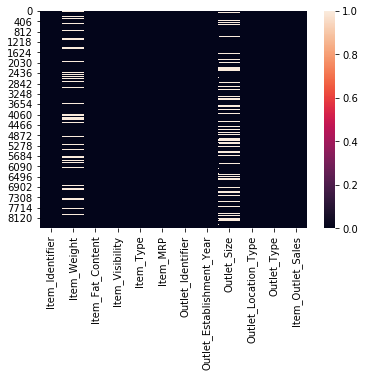

In [393]:
sns.heatmap(df.isnull())

Outlet size for 3 outlets is not available so let's make them "Unknown" inplace of missing values

In [394]:
df["Outlet_Size"].fillna("Unknown",inplace=True)

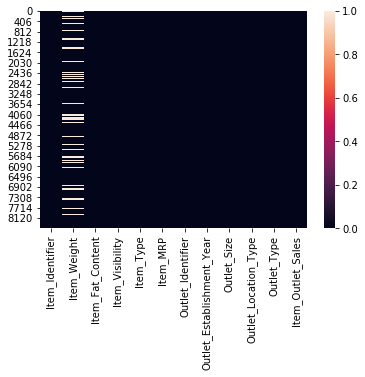

In [395]:
sns.heatmap(df.isnull())

In [396]:
for i in df.columns:
    lst = df[df[i].isnull()].index.tolist()
    for j in lst:
        val1 = df.iloc[[j-1],]["Item_Identifier"].values[0]
        temp = df[(df["Item_Identifier"] == val1)]
        temp_mean = temp[i].mode().values[0]
        df[i][j] = temp_mean

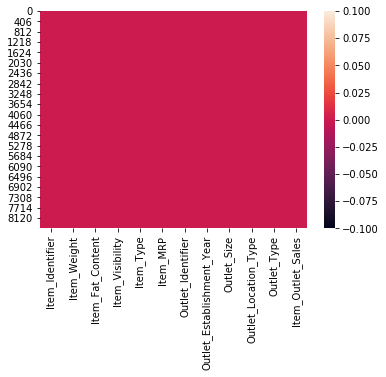

In [397]:
sns.heatmap(df.isnull())

In [398]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [399]:
df.drop("Item_Identifier",axis=1,inplace=True)

Let's convert Outlet_Establishment_Year to a string type for the model

In [400]:
df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype("str")

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   object 
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [402]:
df.shape

(8523, 11)

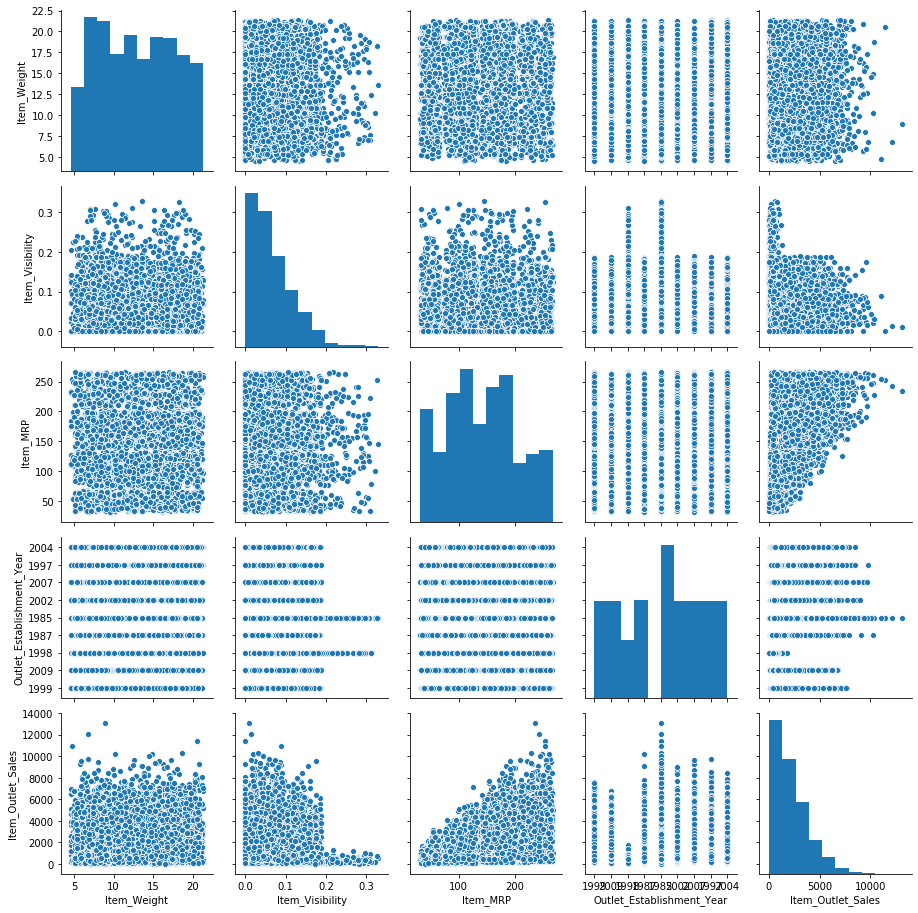

In [232]:
sns.pairplot(df)

In [403]:
dfcor = df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014470,0.021410,0.012659
Item_Visibility,-0.014470,1.000000,-0.001315,-0.128625
Item_MRP,0.021410,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.012659,-0.128625,0.567574,1.000000


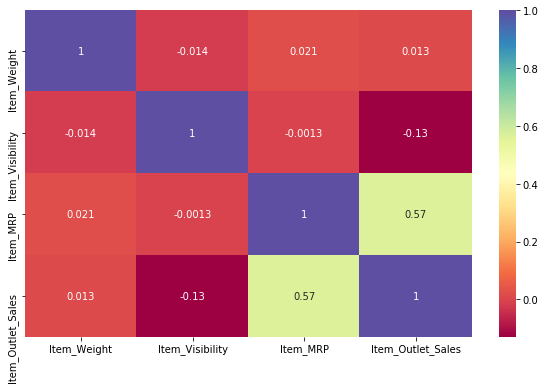

In [404]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Spectral',annot=True)

In [405]:
df.skew()

Item_Weight                  0.074154
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [406]:
cat = pd.get_dummies(df)
cat

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [409]:
cat.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outl

In [410]:
cat.shape

(8523, 52)

In [411]:
cat.drop(["Item_Fat_Content_Regular","Item_Type_Starchy Foods","Outlet_Identifier_OUT049","Outlet_Establishment_Year_2009","Outlet_Size_Unknown","Outlet_Location_Type_Tier 3","Outlet_Type_Grocery Store"],axis=1,inplace=True)

In [412]:
cat.shape

(8523, 45)

In [413]:
X=cat.drop("Item_Outlet_Sales", axis=1)
y=cat["Item_Outlet_Sales"]

In [414]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-0.77181651, -0.97073217,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.50071317, -0.90811123, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.99651267, -0.95691733,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.49147164, -0.59978449, -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.2225248 ,  1.53287976, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.41425794, -0.41193591, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

Finding best random_state for Linear Regression Model

In [416]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 3 is 0.6043353826236584


In [417]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15,random_state=3)

In [418]:
print(X_train.shape,"\n",X_test.shape)

(7244, 44) 
 (1279, 44)


In [420]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [421]:
LR = LinearRegression()
RR = Ridge(alpha=0.1)
LSR = Lasso()
KNR = KNeighborsRegressor(n_neighbors=2)#(n_neighbors=2)
#SV = SVR(kernel='rbf',C=100)
#DTC = DecisionTreeRegressor(random_state=99)
#RFC = RandomForestRegressor(n_estimators = 500,random_state = 178)
#ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 220,random_state=3)
#XGB = xgb.XGBRegressor(random_state=3)

In [422]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
#models.append(("SVR", SV))
#models.append(("DecisionTreeRegressor", DTC))
#models.append(("RandomForestRegressor", RFC))
#models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
#models.append(("XGBoostRegressor", XGB))

In [423]:
from sklearn.model_selection import cross_val_score

In [424]:
Model = []
score = []
cvs = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    print("Mean Squared error\n", mean_squared_error(y_test,pre))
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.6043353826236584


Cross val score =  0.5585227471029763


Mean Squared error
 1180387.5996054607


Mean absolute error 
809.6122145031595



***************** Ridge ******************

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.6043438421045959


Cross val score =  0.5585269553080262


Mean Squared error
 1180362.3624071896


Mean absolute error 
809.6038160235386



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.6061449778630227


Cross val score =  0.5596374172518017


Mean Squared error
 1174989.027969173


Mean absolute er

In [425]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs})
result

,Model,R2 Socre,Cross val score
0,LinearRegression,0.604335,55.852275
1,Ridge,0.604344,55.852696
2,Lasso,0.606145,55.963742
3,KNeighborsRegressor,0.351493,32.386819
4,GradientBoostingRegressor,0.637578,58.282185


Finding the best parameters for gradient boosting regressor

In [309]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [220,240]
             }
model = GradientBoostingRegressor()
grid = GridSearchCV(estimator=GBC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.max_depth)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=240,
                                                 n_iter_no_change=None,
              

In [426]:
from sklearn.externals import joblib
joblib.dump(GBC,'Bigdatamart_sales.csv')

['Bigdatamart_sales.csv']

In [427]:
X1 = pd.read_csv("bigdatamart_test.csv")
X1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [428]:
X1.shape

(5681, 11)

In [429]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Let's process the test dataset as per the training dataset

In [430]:
X1["Item_Identifier"].value_counts()

NCS41    8
DRF48    8
FDQ60    8
FDW10    8
FDP15    8
        ..
NCP05    1
DRF03    1
NCF42    1
FDP28    1
NCM07    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [431]:
X1["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [432]:
X1['Item_Fat_Content'].replace(["LF","low fat"],"Low Fat",inplace=True)
X1['Item_Fat_Content'].replace(["reg"],"Regular",inplace=True)
X1['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [433]:
X1["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [434]:
X1["Item_Type"].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [435]:
X1['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [436]:
X1['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

In [437]:
X1['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [438]:
X1['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [439]:
X1['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [440]:
#Checking for null values
X1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

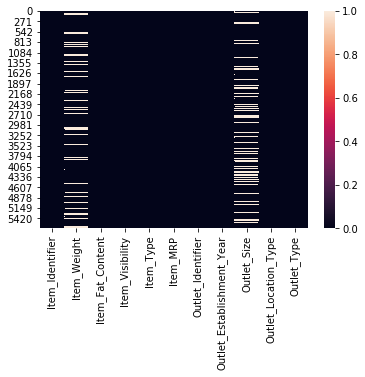

In [441]:
sns.heatmap(X1.isnull())

In [442]:
X1["Outlet_Size"].fillna("Unknown",inplace=True)

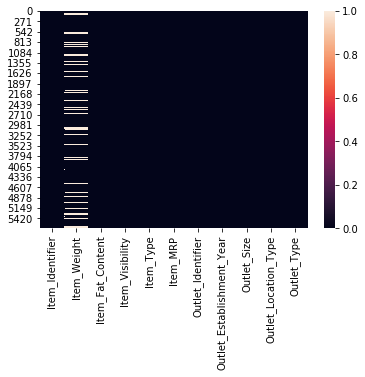

In [443]:
sns.heatmap(X1.isnull())

In [444]:
for i in X1.columns:
    lst = X1[X1[i].isnull()].index.tolist()
    for j in lst:
        val1 = X1.iloc[[j-1],]["Item_Identifier"].values[0]
        temp = X1[(X1["Item_Identifier"] == val1)]
        temp_mean = temp[i].mode().values[0]
        X1[i][j] = temp_mean

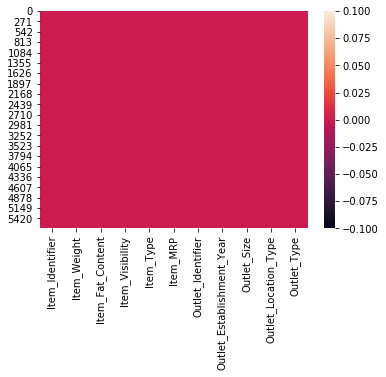

In [445]:
sns.heatmap(X1.isnull())

In [447]:
X1.drop("Item_Identifier",axis=1,inplace=True)

In [448]:
X1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Unknown,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Unknown,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Unknown,Tier 2,Supermarket Type1
4,7.315,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [451]:
X1["Outlet_Establishment_Year"] = X1["Outlet_Establishment_Year"].astype("str")

In [452]:
cat1 = pd.get_dummies(X1)
cat1

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,7.315,0.118599,234.2300,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5677,7.600,0.142991,169.1448,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5678,10.000,0.073529,118.7440,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5679,15.300,0.000000,214.6218,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [453]:
cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 4   Item_Fat_Content_Regular         5681 non-null   uint8  
 5   Item_Type_Baking Goods           5681 non-null   uint8  
 6   Item_Type_Breads                 5681 non-null   uint8  
 7   Item_Type_Breakfast              5681 non-null   uint8  
 8   Item_Type_Canned                 5681 non-null   uint8  
 9   Item_Type_Dairy                  5681 non-null   uint8  
 10  Item_Type_Frozen Foods           5681 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  5681 non-null   uint8  
 12  Item_Type_Hard Drink

In [454]:
cat1.drop(["Item_Fat_Content_Regular","Item_Type_Starchy Foods","Outlet_Identifier_OUT049","Outlet_Establishment_Year_2009","Outlet_Size_Unknown","Outlet_Location_Type_Tier 3","Outlet_Type_Grocery Store"],axis=1,inplace=True)

In [455]:
cat1.shape

(5681, 44)

In [456]:
from sklearn.preprocessing import StandardScaler
X3 = StandardScaler().fit_transform(cat1)
X3

array([[ 1.73732475, -1.13407715, -0.53655526, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [-0.93209407, -0.53185019, -0.86893692, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [ 0.41869618,  0.6613164 ,  1.62984753, ..., -1.37570571,
        -0.34937375, -0.35127385],
       ...,
       [-0.56759512,  0.15307374, -0.36048475, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [ 0.56878398, -1.28168987,  1.19084433, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [-0.67480069,  0.76171558, -0.99067406, ...,  0.72689965,
        -0.34937375, -0.35127385]])

In [458]:
model = joblib.load("Bigdatamart_sales.csv")
sales = model.predict(X3)
print(sales)

[598.92991576 943.07567674  75.08442187 ... 641.06505373 923.32193736
 196.29636863]


In [ ]:
pd.to_csv("")